Project 4: Clustering

Customer Segmentation Using Clustering Algorithms **bold text**


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

**Exploratory Data Analysis**

In [2]:
# Loading the dataset
customer_data = pd.read_csv("/content/sample_data/Mall_Customers.csv", index_col="CustomerID")
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [3]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


**Check for missing values**

In [4]:
missing_info = customer_data.isna().sum().to_frame()
missing_info.columns = ["NA count"]
missing_info

,NA count
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


** Check some dataset statics**

In [6]:
print("Numeric variables:")
display(customer_data.describe().T)
print("-" * 87)
print("Nominal variables:")
display(customer_data.describe(include="O").T)

Numeric variables:


,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


---------------------------------------------------------------------------------------
Nominal variables:


,count,unique,top,freq
Gender,200,2,Female,112


**Features Analysis**

Gender Distribution

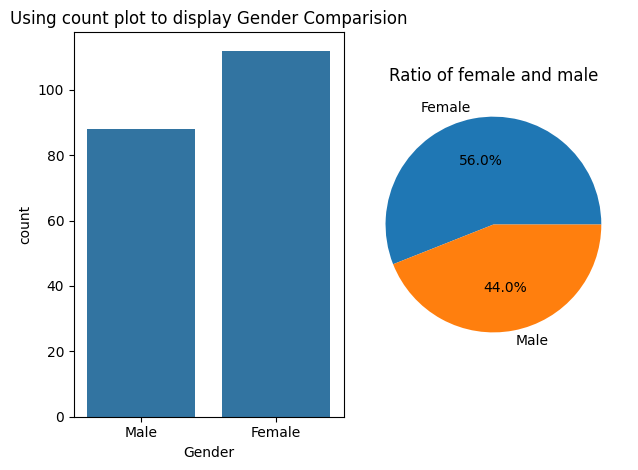

In [7]:
_, (ax1, ax2) = plt.subplots(ncols=2)

sns.countplot(x="Gender", data=customer_data, ax=ax1)
ax1.set_title("Using count plot to display Gender Comparision")

customer_data.groupby("Gender").size().plot.pie(autopct="%.1f%%", ax=ax2)
ax2.set_title("Ratio of female and male")
ax2.set_ylabel("")

plt.tight_layout()

**Distribution plots**

In [8]:
def distribution_plots(data, column, bins, color=None):
    _, (ax1, ax2) = plt.subplots(nrows=2)

    # Seaborn's histplot can combine a histogram and a density estimation function
    # in one single plot.
    sns.histplot(x=column, data=data, kde=True, bins=bins, color=color, ax=ax1)
    ax1.set_title(f"Distribution of {column} feature")

    sns.boxplot(x=column, data=data, color=color, ax=ax2)
    ax2.set_title(f"Boxplot for Descriptive Analysis of {column} feature")

    plt.tight_layout()

Age Distribution

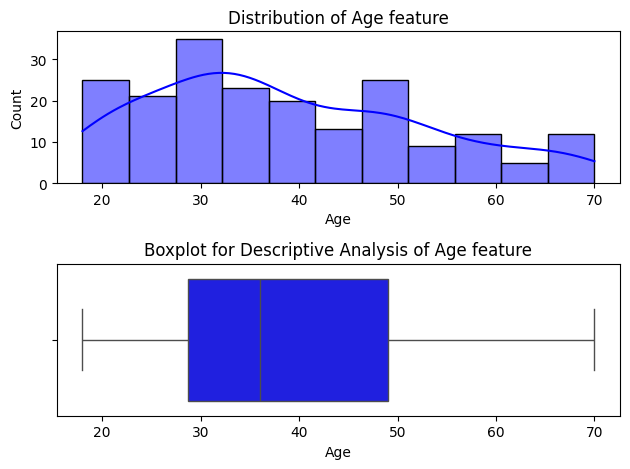

In [9]:
distribution_plots(customer_data, "Age", bins=11, color="blue")

Annual Income of the Customers

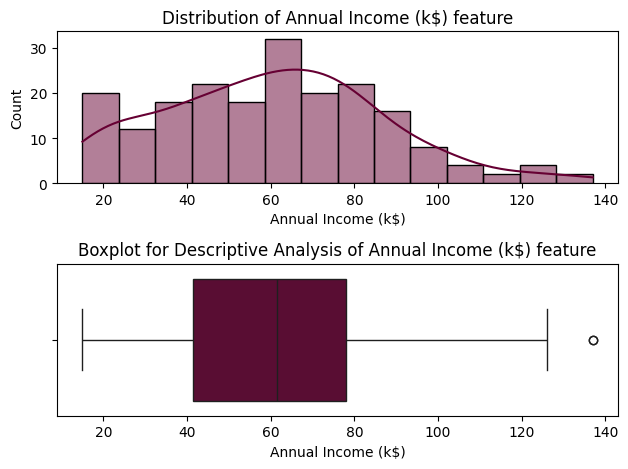

In [10]:
distribution_plots(customer_data, "Annual Income (k$)", bins=14, color="#660033")

Spending Score of the Customers

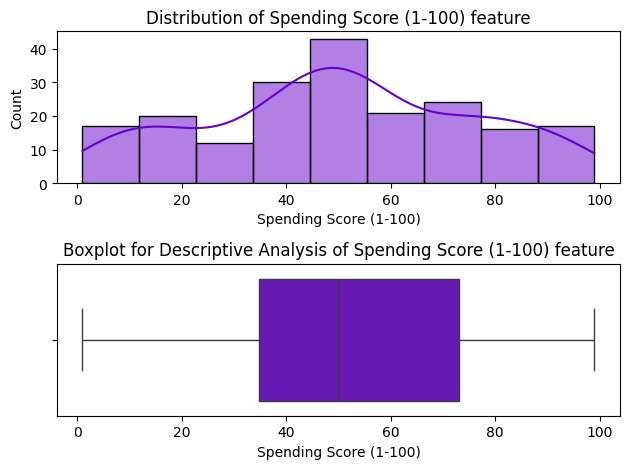

In [11]:
distribution_plots(customer_data, "Spending Score (1-100)", bins=9, color="#6600cc")

**k-means clustering algorithm**

In [12]:
def get_clustering_inertia(k, data):
    kmeans = KMeans(
        n_clusters=k,
        algorithm="lloyd",  # we'll use the classical EM-style algorithm. Refer to sklearn's user guide: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
        n_init=100,
        max_iter=100,
        random_state=42,  # use this to get reproducible results
    ).fit(data)
    return kmeans.inertia_

Determining the Optimal Number of Clusters
Elbow Method **bold text**

In [13]:
customer_data["Gender"] = customer_data["Gender"].replace(
    {"Male": 0, "Female": 1}
)

<ipython-input-13-be644c37066f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_data["Gender"] = customer_data["Gender"].replace(


In [15]:
inertia_values = [
    get_clustering_inertia(k, customer_data.iloc[:, 1:]) for k in range(1, 11)
]

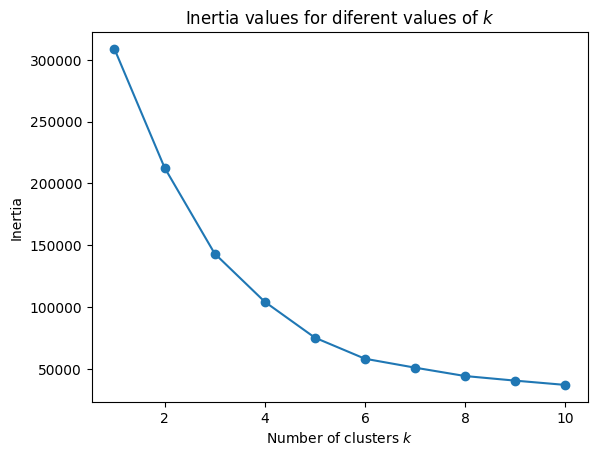

In [16]:
_, ax = plt.subplots()
plt.plot(range(1, 11), inertia_values, "o-")
plt.title("Inertia values for diferent values of $ k $")
plt.xlabel("Number of clusters $ k $")
plt.ylabel("Inertia")
plt.show()

**Final K-means clustering**

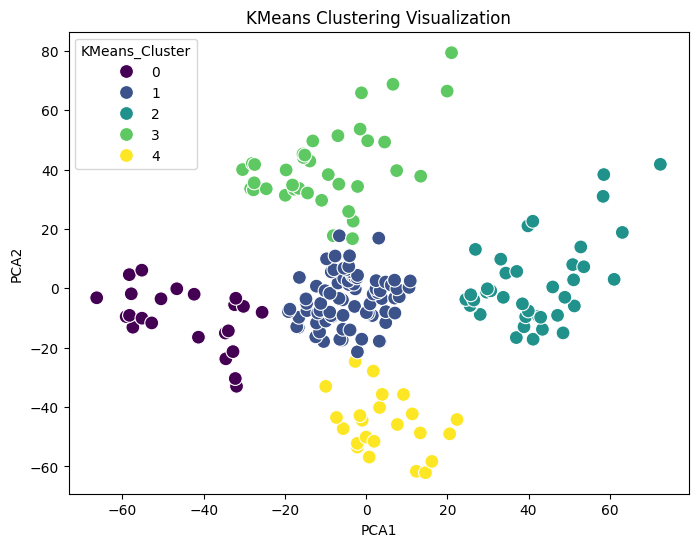

In [17]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples

# Final K-means clustering
kmeans = KMeans(
    n_clusters=5,  # You can set the optimal k based on the elbow plot
    algorithm="lloyd",
    n_init=100,
    max_iter=100,
    random_state=42
)

# Fit K-means model
kmeans_labels = kmeans.fit_predict(customer_data.iloc[:, 1:])

# Add K-means clusters to the dataframe
customer_data["KMeans_Cluster"] = kmeans_labels

# Visualizing KMeans Clusters using PCA (2D visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_data.iloc[:, 1:])
customer_data['PCA1'] = pca_components[:, 0]
customer_data['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="KMeans_Cluster", data=customer_data, palette="viridis", s=100)
plt.title('KMeans Clustering Visualization')
plt.show()